# 勾配を求める関数の実装

In [ ]:
try:
    from google.colab import files
    print('Google Colab. 上での実行です')
    print('「ファイルを選択」から、notebook フォルダにある myplotly.py を選択し、アップロードしてください')
    print('===========')
    files.upload()
except:
    print('ローカル環境での実行です')

### 事前に、端末にてplotlyをインストールしておくこと

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pylab import * #コンタ描画用
import myplotly

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def numerical_diff(f, x):
    """
    数値微分を行う関数
    """
    h = 1e-4
    return (f(x+h) - f(x-h))/ (2*h)

## 偏微分とは
偏微分とは、微分の多次元版。
例えば、$f(x,y)$という関数があった時に、yを定数とみなし$x$にだけ着目して微分することを$x$について偏微分するという。同様に、xを定数とみなし$y$にだけ着目して微分することを$y$について偏微分するという。

## 偏微分の意味を確認する

### 関数 $f(x,y)=(x-3)^2+(2y-1)^2$の描画

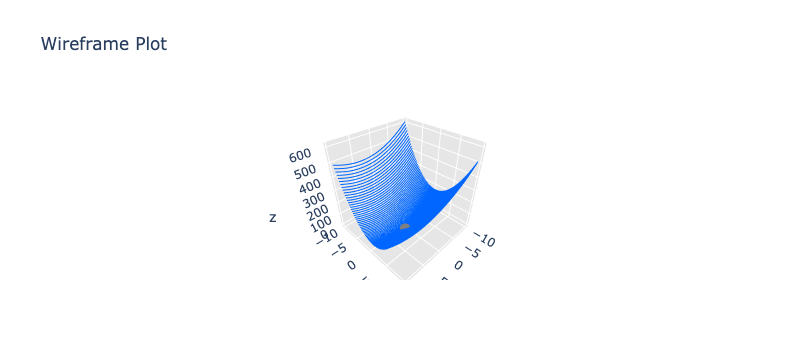

In [ ]:
def fxy(x, y):
    """
    対象となる関数
    """    
    return (x-3)**2 + (2*y-1)**2

#目的関数の値をつくる
axis_x = np.arange(-10,10,0.25)
axis_y = np.arange(-10,10,0.25)
mx, my = meshgrid(axis_x, axis_y) 
mz = fxy(mx, my)

# 3次元で描画
myplotly.graph3d(mx, my, mz, point_x=1,point_y=1,point_z=fxy(1,1), markersize=3)

### 偏微分の意味を断面で確認する

-3.9999999999906777


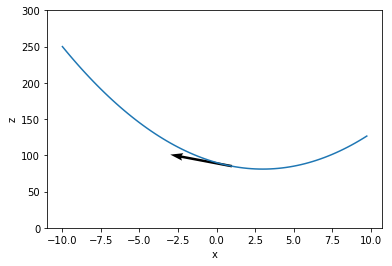

35.9999999999161


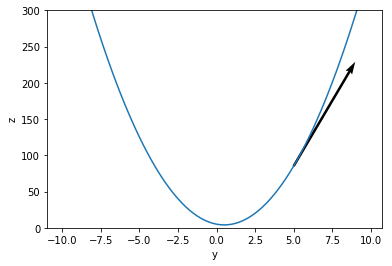

In [ ]:
def fx1(x):
    """
    f(x,y)におけるy=5の断面の関数
    f(x,y)をy=5で固定すると、f(x,y)=(x-3)^2+81になる
    """
    return (x-3)**2 + 81

def f1y(y):
    """
    f(x,y)におけるx=1の断面の関数
    f(x,y)をx=1で固定すると、f(x,y)=4+(2y-1)^2になる
    """
    return 4+(2*y-1)**2

def add_vec(f, x):
    # 矢印（ベクトル）の始点
    X = x
    Y = f(x)

    # 微分を求める
    diff = numerical_diff(f, x)
    print(diff)
    
    # 矢印（ベクトル）の成分
    U = 1 if diff  >=0  else -1
    V = np.abs(diff)

    # 矢印（ベクトル）の描画
    plt.quiver(X,Y,U,V,angles='xy',scale_units='xy',scale=0.25)
    

# 偏微分を行う場所の指定
x = 1
y = 5

# x方向の偏微分
mz = fxy(axis_x, y)
add_vec(fx1, x)
plt.plot(axis_x, mz)
plt.xlabel("x")
plt.ylabel("z")
plt.ylim(0,300)
plt.show()

# y方向の偏微分
mz = fxy(x, axis_y)
add_vec(f1y, y)
plt.plot(axis_y, mz)
plt.xlabel("y")
plt.ylabel("z")
plt.ylim(0,300)
plt.show()

## 勾配ベクトル
偏微分をひとまとまりに表現すると以下のように書ける。  
$$ \nabla f(x,y)=(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y})$$
これを勾配ベクトルと呼ぶ。  
  
勾配ベクトルは、ある場所から少し動いた時に関数の値が最も大きくなる方向とその大きさを表す。

### [演習]
* 勾配を求める以下の関数を完成させましょう。

In [ ]:
# ヒント
x = np.array([1,2,3,4,5]).astype(np.float32) # float型に変換しておく
print(np.zeros_like(x))

x = np.array([1,2,3,4,5]) # int型のままだと、少数以下が無視されてしまう
print(x.dtype)
x[0] = 1.001
x[1] = 2.001
x[2] = 3.999
print(x)

[0. 0. 0. 0. 0.]
int64
[1 2 3 4 5]


In [ ]:
def fxy(x):
    """
    関数 f(x,y)=(x-3)^2+(2y-1)^2 をここに作る
    汎用的に計算できるように、(x-3)^2+(2y-1)^2のxをx[0]、yをx[1]にする
    xはベクトル
    """
    return (x[0]-3)**2 + (2*x[1]-1)**2

def numerical_gradient(f, x):
    """
    全ての次元について、個々の次元だけの微分を求める
    f : 関数
    x : 偏微分を求めたい場所の座標。ベクトル
    """
    h = 1e-4
    grad = np.zeros_like(x)

    for i in range(x.size):
        """
        変数の数だけループを回す
        """
        
        # 値を一時保存
        tmp_val = x[i]

        #  対象の変数だけh動かし、その時の関数値を求める。この時、他の変数は固定
        x[i] = tmp_val + h
        fxh1 = f(x)
            
        #  対象の変数だけ-h動かし、その時の関数値を求める。この時、他の変数は固定
        x[i] = tmp_val - h
        fxh2 = f(x)

        # 数値微分を求める
        grad[i] = (fxh1 - fxh2) / (2*h)
        
        # 一時保存しておいた値を戻す
        x[i] = tmp_val

    return grad

x = np.array([1,1]).astype(np.float32) # float型へ変換しておく
grad = numerical_gradient(fxy, x)
print("座標=%sの勾配ベクトル=%s"%(x, grad))

x = np.array([1,5]).astype(np.float32) # float型へ変換しておく
grad = numerical_gradient(fxy, x)
print("座標=%sの勾配ベクトル=%s"%(x, grad))

座標=[1. 1.]の勾配ベクトル=[-4.0006638  4.0006638]
座標=[1. 5.]の勾配ベクトル=[-4.0006638 36.04889  ]


### [まとめ]
* 偏微分は、微分を多次元に拡張したものと考えれば良い。
* 勾配ベクトルは、ある場所から少し動いた時に関数の値が最も大きくなる方向とその大きさを表す。逆に、マイナスの勾配ベクトルは、ある場所から少し動いた時に関数の値が最も小さくなる方向とその大きさを表す。
* 最急降下法では、負の勾配ベクトルを用いて、関数の値が最も小さくなるところを探す。
* 負の勾配ベクトルは、あくまでも、局所的に関数の値が小さくなる方向を指し示すだけであって、関数の値が最も小さくなる場所へたどり着くことを保証しているわけではない。